## Data Preparing

In [1]:
from PIL import Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torch.utils.data import random_split

In [2]:
trans = transforms.Compose([transforms.Resize((128, 128)),
                            transforms.ToTensor(),
                            transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                            ])
trainset = torchvision.datasets.ImageFolder(root = "./Multi_Classification_Sample_Images",
                                            transform = trans)

In [3]:
trainset.__getitem__(18)

(tensor([[[ 0.2078, -0.2784, -0.3176,  ...,  0.0902,  0.0902,  0.0824],
          [ 0.2549, -0.2392, -0.4353,  ...,  0.0824,  0.0980,  0.0902],
          [ 0.2392,  0.0510, -0.1608,  ...,  0.0980,  0.1059,  0.1137],
          ...,
          [ 0.6000,  0.6235,  0.5216,  ...,  0.1373,  0.1059,  0.3490],
          [ 0.6000,  0.5608,  0.6157,  ...,  0.2235,  0.2235,  0.5059],
          [ 0.6157,  0.6000,  0.7020,  ...,  0.7020,  0.7176,  0.7098]],
 
         [[ 0.3020, -0.2941, -0.3490,  ...,  0.3333,  0.3333,  0.3333],
          [ 0.3647, -0.2392, -0.4824,  ...,  0.3412,  0.3255,  0.3176],
          [ 0.3569,  0.1216, -0.1529,  ...,  0.3333,  0.2863,  0.2784],
          ...,
          [ 0.1686,  0.2157,  0.1059,  ..., -0.0353, -0.0745,  0.0275],
          [ 0.1686,  0.1373,  0.2000,  ...,  0.0118,  0.0196,  0.2157],
          [ 0.1843,  0.1686,  0.2706,  ...,  0.3569,  0.4118,  0.3725]],
 
         [[ 0.3961, -0.3804, -0.6078,  ...,  0.6000,  0.6078,  0.6157],
          [ 0.4980, -0.1843,

In [4]:
len(trainset)

1200

In [5]:
classes = trainset.classes
classes

['adress',
 'backswing',
 'backswingtop',
 'downswing',
 'finish',
 'follow',
 'impact',
 'takeback']

## Data Upload Via DataLoader

In [6]:
trainset, testset = random_split(trainset, [960, 240])
print(len(trainset), len(testset))

960 240


In [7]:
testset, valset = random_split(testset, [120, 120])
print(len(testset), len(valset))

120 120


In [8]:
batch_size = 4
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2) # 훈련용
validloader = DataLoader(valset, batch_size=batch_size, shuffle=False, num_workers=2) # 검증용
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2) # 테스트용

In [9]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(labels)

tensor([1, 7, 6, 1])


## Image Visualization

In [10]:
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    np_img = img.numpy()
    # plt.imshow(np_img)
    plt.imshow(np.transpose(np_img, (1,2,0)))

    print(np_img.shape)
    print((np.transpose(np_img, (1,2,0))).shape)

torch.Size([4, 3, 128, 128])
(3, 132, 522)
(132, 522, 3)
torch.Size([4, 3, 128, 128])
torch.Size([3, 132, 522])
backswing takeback impact backswing 


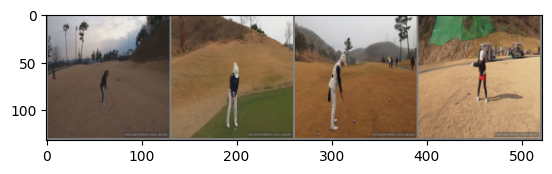

In [11]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]] for j in range(4)))

## Dataset Verification Via Visualization

In [12]:
print(type(trainset[0][0]), type(trainset[0][1]))

<class 'torch.Tensor'> <class 'int'>


In [13]:
trainset[0][0].size()

torch.Size([3, 128, 128])

In [14]:
# 1번 샘플
sample_img = trainset[1][0]
sample_img.size()

torch.Size([3, 128, 128])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


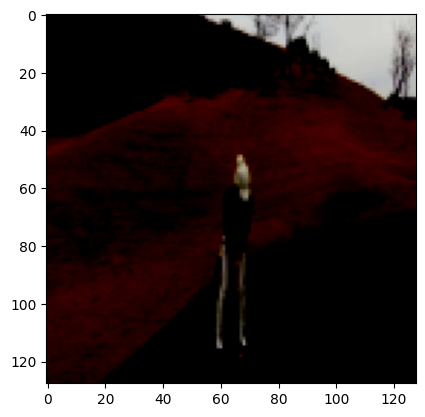

In [15]:
plt.imshow(sample_img.permute(1, 2, 0))

In [16]:
trainset[1][1]

7

- numpy로 변환한 뒤 matplotlib으로 표시할 경우

In [17]:
sample_img.size()

torch.Size([3, 128, 128])

In [18]:
numpy_sample = sample_img.numpy()
numpy_sample.shape

(3, 128, 128)

In [19]:
type(numpy_sample)

numpy.ndarray

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


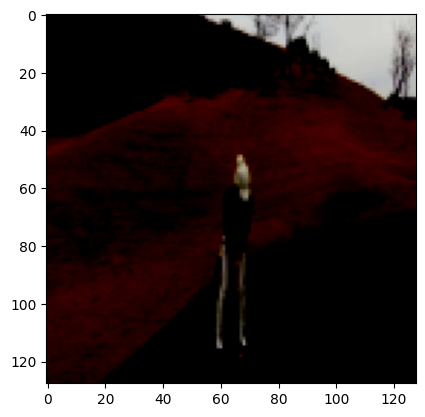

In [20]:
plt.imshow(numpy_sample.transpose(1, 2, 0)) # 차원 순서 변경할 때 tensor는 permute, ndarray는 transpose

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


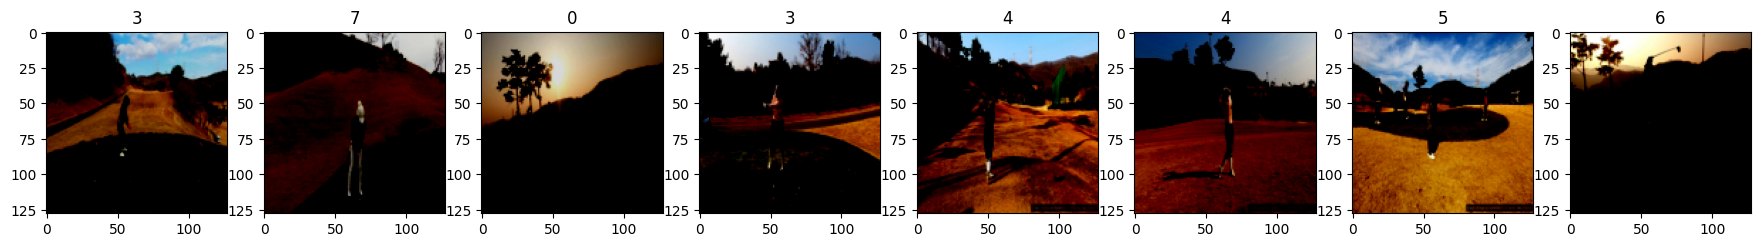

In [21]:
figure, axes = plt.subplots(nrows=1, ncols=8, figsize=(22, 6))
for i in range(8):
  axes[i].imshow(trainset[i][0].permute(1, 2, 0), cmap='gray')
  axes[i].set_title(trainset[i][1])   

## Data Separation

**trainset**

In [22]:
sample_img = testset[100][0]
sample_img.size()

torch.Size([3, 128, 128])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


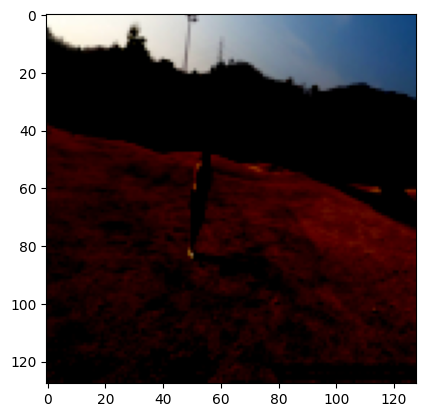

In [23]:
plt.imshow(sample_img.permute(1, 2, 0))

In [24]:
testset[100][0].size(), testset[100][1]

(torch.Size([3, 128, 128]), 7)

In [25]:
trainset[600][0].size(), trainset[600][1]

(torch.Size([3, 128, 128]), 1)

**testset, valset**

In [26]:
sample_img1 = valset[100][0]
sample_img1.size()

torch.Size([3, 128, 128])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


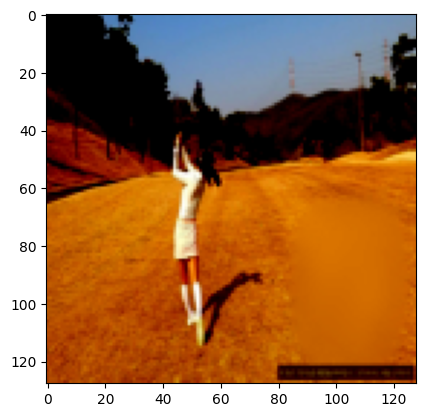

In [27]:
plt.imshow(sample_img1.permute(1, 2, 0))

In [28]:
valset[100][0].size(), valset[100][1]

(torch.Size([3, 128, 128]), 4)

In [29]:
valset[20][0].size(), valset[20][1]

(torch.Size([3, 128, 128]), 5)

#### More Variable Visualization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


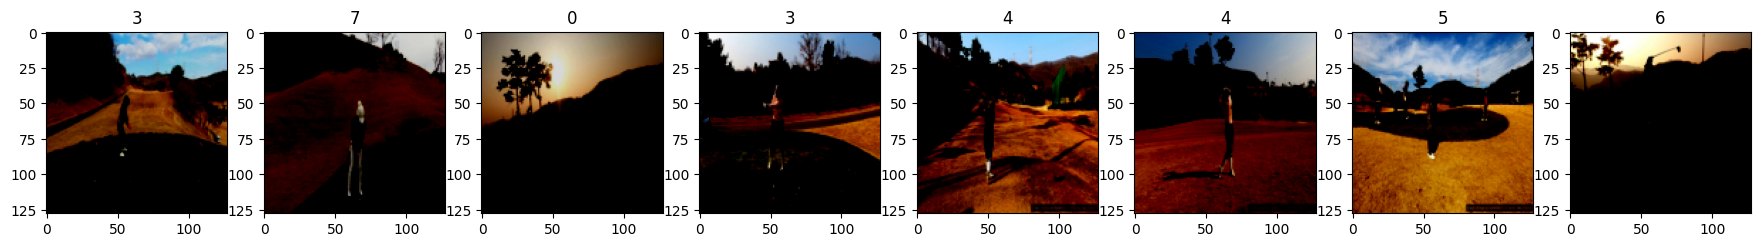

In [30]:
figure, axes = plt.subplots(nrows=1, ncols=8, figsize=(22, 6))
for i in range(8):
  axes[i].imshow(trainset[i][0].permute(1, 2, 0), cmap='gray')
  axes[i].set_title(trainset[i][1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

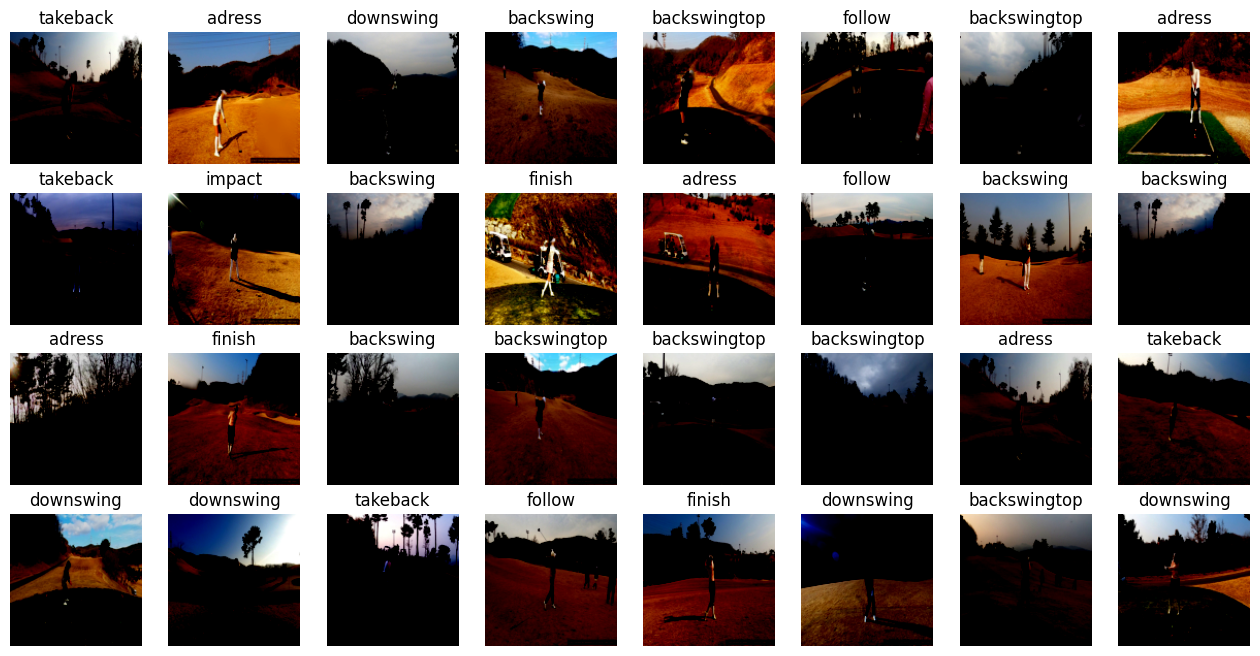

In [31]:
labels_map = {0 : 'adress', 1 : 'backswing', 2: 'backswingtop', 3: 'downswing', 4: 'finish', 5: 'follow', 6: 'impact', 7: 'takeback'}

figure, axes = plt.subplots(nrows=4, ncols=8, figsize=(16, 8))
axes = axes.flatten()

for i in range(32):
    rand_i = np.random.randint(0, len(trainset))
    image = trainset[rand_i][0].permute(1, 2, 0)
    axes[i].axis('off')
    axes[i].imshow(image)
    axes[i].set_title(labels_map[trainset[rand_i][1]])    

## Model Organization

In [34]:
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.optim as optim
import copy
import sys, time
from torch.autograd import Variable

In [35]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet34', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet152', pretrained=True)
model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [36]:
from torchsummary import summary
summary(model.cuda(), (3,128,128))
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           9,408
       BatchNorm2d-2           [-1, 64, 64, 64]             128
              ReLU-3           [-1, 64, 64, 64]               0
         MaxPool2d-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
              ReLU-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
             ReLU-10           [-1, 64, 32, 32]               0
       BasicBlock-11           [-1, 64, 32, 32]               0
           Conv2d-12           [-1, 64, 32, 32]          36,864
      BatchNorm2d-13           [-1, 64, 32, 32]             128
             ReLU-14           [-1, 64,

In [37]:
class TrainModel():
    def __init__(self,model, criterion, optimizer, trainloader, testloader, num_epochs=5):
        
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'

        self.model = model.to(self.device)
        self.trainloader =trainloader
        self.testloader = testloader
        self.criterion = criterion
        self.optimizer = optimizer
        self.num_epochs = num_epochs
        self.best_acc_wts = copy.deepcopy(self.model.state_dict())
        self.best_acc =0.0

        
        for epoch in range(1, self.num_epochs+1):
            print('Epoch {}/{}'.format(epoch, self.num_epochs))
            self.train()
            self.test()

        model.load_state_dict(self.best_acc_wts)

    def train(self):
        self.model.train()
        train_loss = 0
        correct = 0
        total = 0
        for batch_idx, (inputs, targets) in enumerate(self.trainloader):
            inputs, targets = inputs.to(self.device), targets.to(self.device)
            self.optimizer.zero_grad()
            outputs = self.model(inputs)
            loss = self.criterion(outputs, targets.long())
            loss.backward()
            self.optimizer.step()

            train_loss += loss.data.cpu().numpy()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

        epoch_loss = train_loss /len(self.trainloader)
        epoch_acc = correct / total
        print('train | Loss: {:.4f} Acc: {:.4f}'.format( epoch_loss, epoch_acc))

    def test(self):
        global best_acc
        self.model.eval()
        test_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for batch_idx, (inputs, targets) in enumerate(self.testloader):
                inputs, targets = inputs.to(self.device), targets.to(self.device)
                outputs = self.model(inputs)
                loss = self.criterion(outputs, targets.long())

                test_loss += loss.data.cpu().numpy()
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()

            epoch_loss = test_loss /len(self.testloader)
            epoch_acc = correct / total
            print('test | Loss: {:.4f} Acc: {:.4f}'.format( epoch_loss, epoch_acc))
            if epoch_acc >= self.best_acc:
                self.best_acc = epoch_acc
                self.best_acc_wts = copy.deepcopy(self.model.state_dict())

In [38]:
TrainModel(model, criterion=criterion, optimizer=optimizer,trainloader=trainloader,testloader=validloader,num_epochs=10)

Epoch 1/10
train | Loss: 4.9703 Acc: 0.1292
test | Loss: 2.7449 Acc: 0.1333
Epoch 2/10
train | Loss: 2.7213 Acc: 0.1500
test | Loss: 2.9616 Acc: 0.1333
Epoch 3/10
train | Loss: 2.5063 Acc: 0.1479
test | Loss: 2.4116 Acc: 0.1250
Epoch 4/10
train | Loss: 2.3044 Acc: 0.1646
test | Loss: 2.7708 Acc: 0.1500
Epoch 5/10
train | Loss: 2.2505 Acc: 0.1812
test | Loss: 3.1726 Acc: 0.2083
Epoch 6/10
train | Loss: 2.1831 Acc: 0.1844
test | Loss: 2.5881 Acc: 0.1667
Epoch 7/10
train | Loss: 2.1305 Acc: 0.1771
test | Loss: 2.4572 Acc: 0.1583
Epoch 8/10
train | Loss: 2.0469 Acc: 0.2208
test | Loss: 2.0715 Acc: 0.1750
Epoch 9/10
train | Loss: 1.9777 Acc: 0.2208
test | Loss: 2.3687 Acc: 0.1750
Epoch 10/10
train | Loss: 1.9831 Acc: 0.2385
test | Loss: 2.4828 Acc: 0.1750


In [39]:
def test(model,testloader,criterion):
        model.eval()
        test_loss = 0
        correct = 0
        total = 0
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        with torch.no_grad():
            for batch_idx, (inputs, targets) in enumerate(testloader):
                inputs,targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets.long())     

                test_loss += loss.data.cpu().numpy()
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()
                
            epoch_loss = test_loss / len(testloader)
            epoch_acc = correct / total
            print('test | Loss: {:.4f} Acc: {:.4f}'.format( epoch_loss, epoch_acc))

test(model,testloader,criterion)

test | Loss: 3.2510 Acc: 0.1500
